In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.cluster import KMeans

In [2]:
df_encoded = pd.read_csv('Data_Preproc_Encoded.csv')
df_encoded.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1.619462,6,2,6,0,2,0,10,3.076705,0.492293,11,1,2,0,3
1,1.873982,6,2,6,0,2,0,10,3.385311,0.601900,11,1,2,0,2
2,1.393432,6,2,6,0,2,0,10,3.328931,0.557061,11,1,2,0,3
3,1.412426,2,3,1,0,2,0,10,2.726555,0.381690,11,1,5,0,3
4,1.501699,6,3,6,0,2,0,10,2.952075,0.503254,11,1,5,0,3


In [3]:
df_no_encoded = pd.read_csv('Data_Preproc_NoEncoding.csv')
df_no_encoded.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,x,g,o,f,e,c,w,16.95,17.09,w,t,g,d,w
1,16.60,x,g,o,f,e,c,w,17.99,18.19,w,t,g,d,u
2,14.07,x,g,o,f,e,c,w,17.80,17.74,w,t,g,d,w
3,14.17,f,h,e,f,e,c,w,15.77,15.98,w,t,p,d,w
4,14.64,x,h,o,f,e,c,w,16.53,17.20,w,t,p,d,w


In [4]:
df_class = pd.read_csv('Labels.csv')
df_class.replace('p', 1, inplace=True)
df_class.replace('e', 0, inplace=True)
df_class

,class
0,1
1,1
2,1
3,1
4,1
...,...
61064,1
61065,1
61066,1
61067,1


In [5]:
df_encoded.shape, df_class.shape

((61069, 15), (61069, 1))

In [6]:
numeric_cols = df_no_encoded.select_dtypes(include=['number']).columns
print(numeric_cols)

Index(['cap-diameter', 'stem-height', 'stem-width'], dtype='object')


In [7]:
df_numeric = df_no_encoded[numeric_cols]
df_numeric.head()

,cap-diameter,stem-height,stem-width
0,15.26,16.95,17.09
1,16.60,17.99,18.19
2,14.07,17.80,17.74
3,14.17,15.77,15.98
4,14.64,16.53,17.20


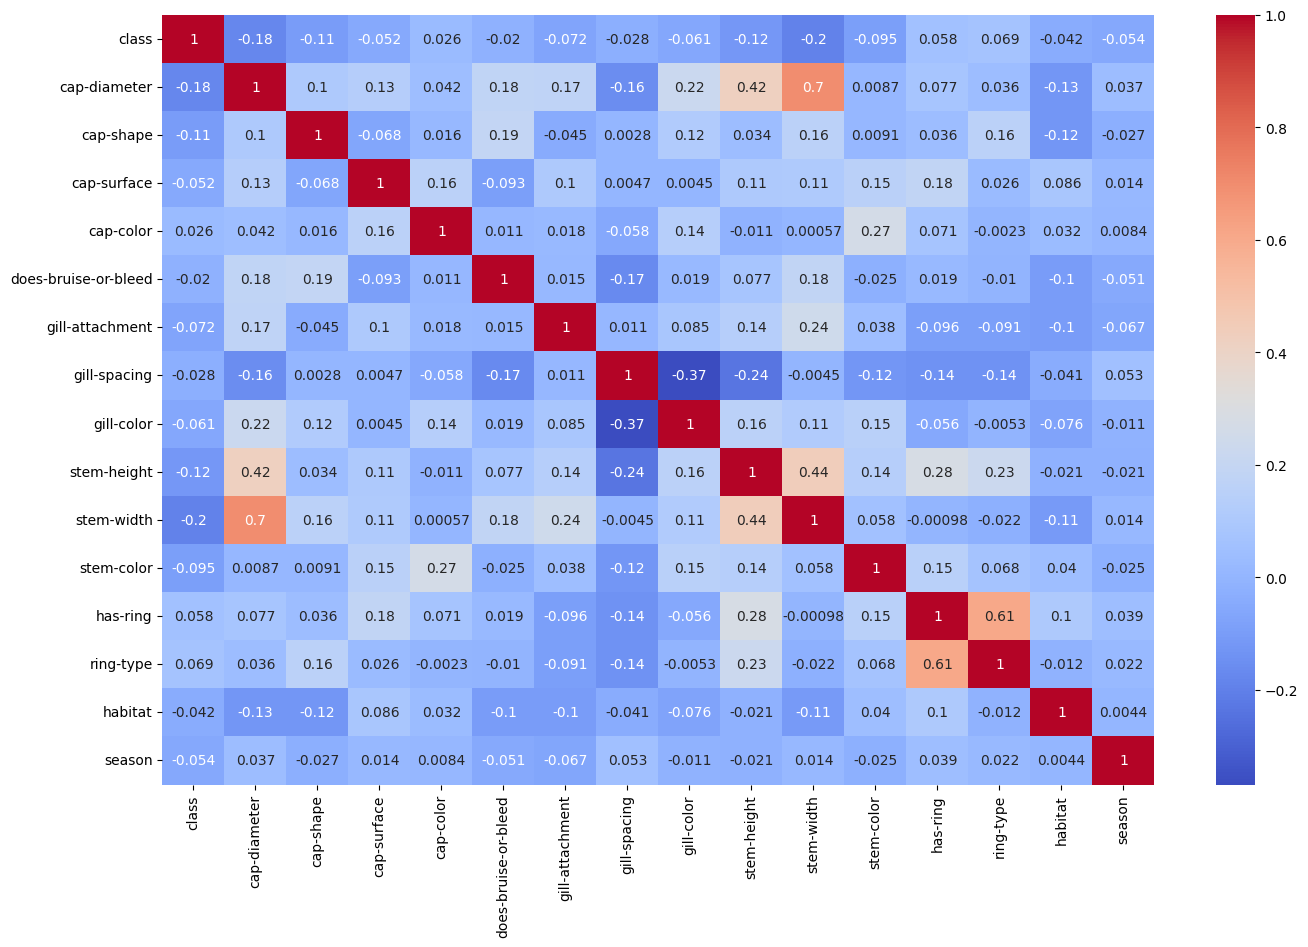

In [8]:
df = pd.concat([df_class, df_encoded], axis=1)

fig = plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [9]:
y = df_class.values
X = df_numeric.values

select_k_best = SelectKBest(score_func=f_classif, k=1)

# Fit and transform the input data using select_k_best
X_new = select_k_best.fit_transform(X,y)

# Extract the features which are selected using get_support API
features_mask = select_k_best.get_support()


### END CODE HERE ###

# Print the results
reqd_cols = pd.DataFrame({'Columns': df_numeric.columns, 'Retain': features_mask})
print(reqd_cols)

        Columns  Retain
0  cap-diameter   False
1   stem-height   False
2    stem-width    True


c:\Users\siya1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

lr = LogisticRegression()
selector = SelectFromModel(lr, max_features = 12).fit(df_encoded, df_class)
features_mask2 = selector.get_support()

reqd_cols = pd.DataFrame({'Columns': df_encoded.columns, 'Retain': features_mask2})
print(reqd_cols)

c:\Users\siya1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                 Columns  Retain
0           cap-diameter    True
1              cap-shape   False
2            cap-surface   False
3              cap-color   False
4   does-bruise-or-bleed   False
5        gill-attachment   False
6           gill-spacing    True
7             gill-color   False
8            stem-height    True
9             stem-width    True
10            stem-color   False
11              has-ring    True
12             ring-type   False
13               habitat    True
14                season   False


C:\Users\siya1\AppData\Local\Temp\ipykernel_15776\3814579977.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(df_encoded, df_class)


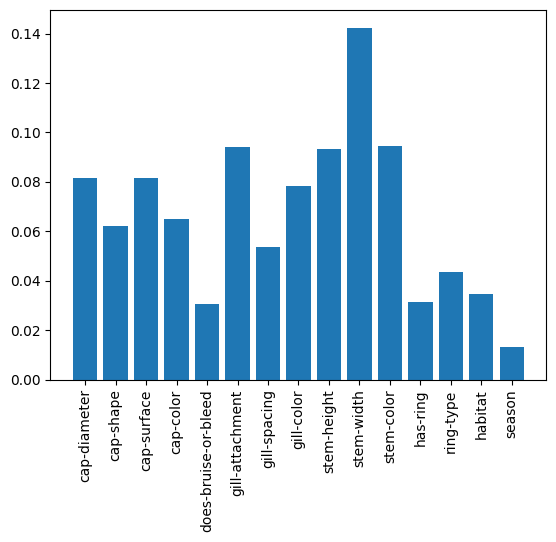

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(df_encoded, df_class)

importances = model.feature_importances_

final_df = pd.DataFrame({'Features': df_encoded.columns, 'Importance': importances})
# final_df.set_index('Importance', inplace=True)
final_df.sort_values(by='Importance', ascending=False)

final_df

plt.bar(final_df['Features'], final_df['Importance'])
plt.xticks(rotation=90)
plt.show()

features to drop :  does-bruise-or-bleed, has-ring, season, cap-diameter, stem-height

In [12]:
drop =  ['does-bruise-or-bleed', 'has-ring', 'season', 'cap-diameter', 'stem-height']
cols = [col for col in df_encoded.columns if col not in drop]

df_selected = df_encoded[cols]
df_selected.head()

,cap-shape,cap-surface,cap-color,gill-attachment,gill-spacing,gill-color,stem-width,stem-color,ring-type,habitat
0,6,2,6,2,0,10,0.492293,11,2,0
1,6,2,6,2,0,10,0.601900,11,2,0
2,6,2,6,2,0,10,0.557061,11,2,0
3,2,3,1,2,0,10,0.381690,11,5,0
4,6,3,6,2,0,10,0.503254,11,5,0


In [13]:
df_selected.shape

(61069, 10)

In [14]:
df_selected.to_csv('Data_Feature_Selected.csv', index=False)

## Clustering

In [15]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=10, centers=3, n_features=4)

# df = pd.DataFrame(df_encoded, columns=df_encoded.columns)

kmeans = KMeans(n_clusters=2)

y = kmeans.fit_predict(df_encoded)
df_cluster = df_encoded.copy()
df_cluster['Cluster'] = y

print(df_cluster.head())

   cap-diameter  cap-shape  cap-surface  cap-color  does-bruise-or-bleed  \
0      1.619462          6            2          6                     0   
1      1.873982          6            2          6                     0   
2      1.393432          6            2          6                     0   
3      1.412426          2            3          1                     0   
4      1.501699          6            3          6                     0   

   gill-attachment  gill-spacing  gill-color  stem-height  stem-width  \
0                2             0          10     3.076705    0.492293   
1                2             0          10     3.385311    0.601900   
2                2             0          10     3.328931    0.557061   
3                2             0          10     2.726555    0.381690   
4                2             0          10     2.952075    0.503254   

   stem-color  has-ring  ring-type  habitat  season  Cluster  
0          11         1          2       

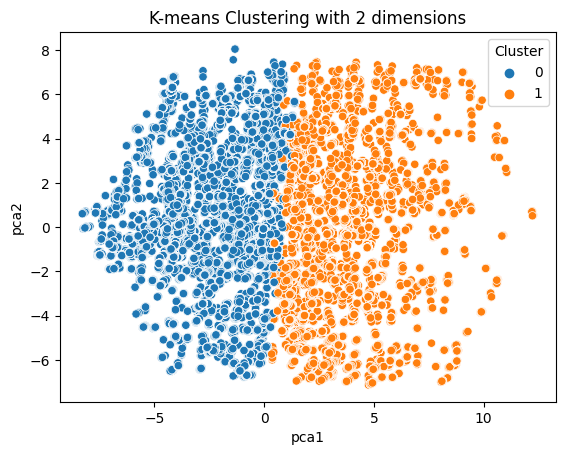

In [16]:
from sklearn.decomposition import PCA

pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_cluster)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df_cluster['Cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

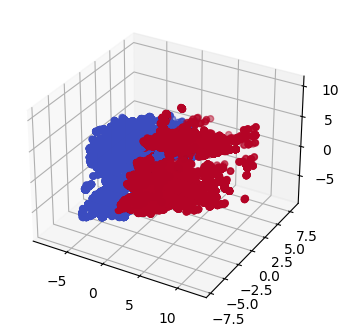

In [20]:
pca_num_components = 3

reduced_data = PCA(n_components=pca_num_components).fit_transform(df_cluster)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2','pca3'])


plt.figure(figsize = (5, 4))
seaborn_plot = plt.axes(projection='3d')
seaborn_plot.scatter3D(results['pca1'], results['pca2'], results['pca3'], c=df_cluster['Cluster'], cmap='coolwarm')